In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

#Website to pick up positive and negative words for this exercise

http://ptrckprry.com/course/ssd/data/negative-words.txt
http://ptrckprry.com/course/ssd/data/positive-words.txt
    
Download and store this file as Positive.txt and Negative.txt in current working directory

In [2]:
with open('Positive.txt', 'r') as f2:
    pos = f2.read()
positive = list(pos.splitlines())

In [3]:
with open('Negative.txt', 'r') as f2:
    neg = f2.read()
negative = list(neg.splitlines())

In [4]:
print("Number of positive words: ", len(positive)) #2006
print("Number of negative words: ", len(negative)) #4783
print("Total number of words: ", len(positive) + len(negative)) #6789

Number of positive words:  2006
Number of negative words:  4783
Total number of words:  6789


In [5]:
print("First ten words in Positive List: \n", positive[:10])
print("First ten words in Negative List: \n", negative[:10])

First ten words in Positive List: 
 ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
First ten words in Negative List: 
 ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [6]:
#Include words that contain only alphabets
#Total words for consideration shall reduce from 6789 to 6562
positive_words = [w for w in positive if w.isalpha()]
negative_words = [w for w in negative if w.isalpha()]
print("First ten words in Positive List: \n", positive_words[:10])
print("First ten words in Negative List: \n", negative_words[:10])
print("Total number of words: ", len(positive_words) + len(negative_words))

First ten words in Positive List: 
 ['abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade']
First ten words in Negative List: 
 ['abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade']
Total number of words:  6562


In [7]:
# Visit https://nlp.stanford.edu/projects/glove/

#GloVe is an unsupervised learning algorithm for obtaining vector representations for words. 
#Training is performed on aggregated global word-word co-occurrence statistics from a corpus, 
#and the resulting representations showcase interesting linear substructures of the word vector space.

# Download glove.6B.zip available under download pre-trained word vectors
# Unzip the file to get 4 text files: glove.6B.50d.txt, glove.6B.100d.txt, glove.6B.200d.txt, glove.6B.300d.txt
# Store these files in the current working directory

# Open the file glove.6B.50d.txt

f = open('glove.6B.50d.txt', encoding = 'utf-8')
emb_dict = {}

#For every line in glove
#Check if the word in glove is present in either positive or negative wordlist
#If word from glove is present in positive_words append the vector with 1.0
#If word from glove is present in negative_words append the vector with 0.0

#This code takes few minutes to execute depending upon your computer configuration

for line in f:
    values = line.split(' ')
    word = values[0] ## The first entry is the word
    vector = np.asarray(values[1:], dtype='float32') ## These are the vecotrs representing the embedding for the word
    if word in positive_words:
        vector = np.append(vector, [1.0]) #Append 1.0 as last element if GloVe word is positive
        emb_dict[word] = vector
    if word in negative_words: 
        vector = np.append(vector, [0.0]) #Append 0.0 as last element if GloVe word is positive
        emb_dict[word] = vector
f.close()

In [8]:
#Only 6088 words in GloVe are available out of 6562 words available in list of positive_words and negative_words

print("Number of words in the embedded dictionary created: ", len(emb_dict))

#Check the content of elements of specific word and check for inclusion of 1 (positive) or 0 (negative)
print("One Hot Vector code for word support: \n", emb_dict["support"])
print("Number of elements for word support: ", len(emb_dict["support"])) 
#51 elements. Last element is either 1 or 0 depending upon positive or negative
print("One Hot Vector code for word abnormal: \n", emb_dict["abnormal"])
print("Number of elements for word abnormal: ", len(emb_dict["abnormal"])) #51 elements.

Number of words in the embedded dictionary created:  6088
One Hot Vector code for word support: 
 [ 0.36274001 -0.033799    0.73714    -0.41275001  0.17885     0.28384
 -0.24078    -0.26093999 -0.059845   -0.04074     0.076052   -0.10649
  0.2413     -0.27102    -1.02190006 -0.14183     0.15020999 -0.31005001
  0.71859998 -0.42427999 -0.049672    0.1063     -0.25183001 -0.61770999
 -0.10167    -1.73000002  0.38166001 -0.72860998 -0.46377999  0.56633002
  3.77550006  0.75739998 -0.99729002 -0.73075002 -0.32681999 -0.23345999
 -0.12167    -0.1636     -0.79290003 -0.63738     0.20036    -0.033997
 -0.36449999 -0.38150999 -0.12014     0.019369   -0.89390999  0.51591003
 -0.2976      0.067125    1.        ]
Number of elements for word support:  51
One Hot Vector code for word abnormal: 
 [ 0.36660999 -0.038078   -0.40967     0.14612     0.13959999  0.95191997
  1.38240004  0.027714    0.94625998  0.82260001  1.54209995 -0.23259
  0.29028001  0.65035999  0.18186     0.56213999 -0.69217002 -0

In [9]:
#Define a function to predict sentiment of the word given. This is based on the last element of vector hot coded 
def predict_Sentiments(words):
    senti = emb_dict[words]
    print(words, "is Positive") if senti[50] == 1 else print(words, "is Negative")

In [10]:
#Checking whether words are positive or negative
predict_Sentiments("support")
predict_Sentiments("abnormal")

support is Positive
abnormal is Negative


In [11]:
#Features are the one hot vector numbers(first 50 elements) associated with the word
#Labels are the last element in the value in dictionary
def features_and_labels(words):
    senti = emb_dict[words]
    features = senti[:50]
    labels = senti[50]
    return features, labels

In [12]:
#keys variable shall hold all the 6088 words in GloVe which can be resolved as positive or negative

keys = list(emb_dict.keys())

#Collect all features of a word (50 dimensions) in X variable
#Collect all labels (either 1 for Positive or 0 for negative in y variable)

X = []
y = []
for i in keys:
    features, labels = features_and_labels(i) #Call the function
    X.append(features)
    y.append(labels)

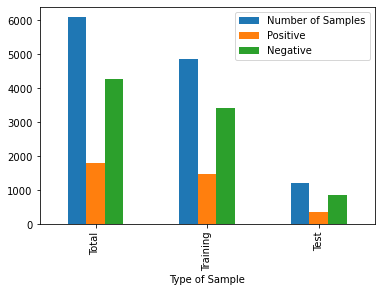

In [13]:
#Word is not available. Instead features as a 50d vector and label as a 1d scalar
#Split the data 80% for training and 20% for testing for developing a perceptron model with a random_state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

totSam = len(X)
totPosSam = sum(y)
totNegSam = totSam - totPosSam

totTrgSam = len(X_train)
totPosTrgSam = sum(y_train)
totNegTrgSam = totTrgSam - totPosTrgSam

totTestSam = len(X_test)
totPosTestSam = sum(y_test)
totNegTestSam = totTestSam - totPosTestSam

total = ['Total', totSam, totPosSam, totNegSam]
training = ['Training', totTrgSam, totPosTrgSam, totNegTrgSam]
test = ['Test', totTestSam,totPosTestSam, totNegTestSam]

mylist = [total, training, test]

data = pd.DataFrame(mylist, columns = ['Type of Sample', 'Number of Samples', 'Positive', 'Negative'])

data.plot('Type of Sample' , ['Number of Samples','Positive','Negative'], kind='bar')

plt.show()
#Approximately 30% of total and training samples are positive
#Approximately 29% of test samples are positive
#So, majority sample of words are negative

In [14]:
#Make a perceptron classifier with learning rate as eta and max number of iterations = 5000
clf = Perceptron(eta0=0.00001, max_iter=5000)
clf.fit(X_train, y_train)

Perceptron(eta0=1e-05, max_iter=5000)

In [150]:
trgAccPerc = (clf.score(X_train,y_train))*100 #Training accuracy is 83.14%

In [151]:
testAccPerc = (clf.score(X_test,y_test))*100 #Testing accuracy is 81.85%

In [17]:
# Function to check given words are positive or negative
def predSent(word):
    senti = emb_dict[word]
    val = clf.predict(senti[:-1].reshape(1,-1))
    print(word, "is Positive") if val == 1 else print(word, "is Negative")    

In [18]:
#Test a word
predSent("abnormal")

abnormal is Negative


In [19]:
#Test another word
predSent("support")

support is Positive


In [20]:
#Let us create 10 test words in random from a list called keys
wordTest = []
for i in range(10):
    n =random.randint(0,6088)
    word = keys[n]
    wordTest.append(word)
print(wordTest)

['lying', 'insinuation', 'emphatic', 'precarious', 'exorbitant', 'victorious', 'backbiting', 'blatant', 'profusion', 'ambitious']


In [21]:
#Test these words for Sentiment analysis
#Training and testing accuracy is 83.14% and 81.14% respectively. Errors in classification at times can be observed
for i in wordTest:
    predSent(i)

lying is Negative
insinuation is Negative
emphatic is Positive
precarious is Negative
exorbitant is Negative
victorious is Positive
backbiting is Negative
blatant is Negative
profusion is Negative
ambitious is Positive


In [22]:
clf.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1e-05,
 'fit_intercept': True,
 'max_iter': 5000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [23]:
print("Weights assigned by sklearn Perceptron: \n", clf.coef_[0])

Weights assigned by sklearn Perceptron: 
 [ 3.96730651e-05 -8.07191379e-06 -2.95617471e-06  4.73685004e-05
  5.46926753e-05 -1.00632019e-04  5.87799460e-06 -5.44371529e-05
  3.59223327e-05  1.97268868e-05 -1.41534800e-05  4.20701387e-05
 -1.93724577e-05  3.24543110e-05 -4.37569995e-05  1.60712748e-05
  3.23451531e-05 -9.30831011e-06  7.47684910e-06 -3.33968312e-06
  4.16513596e-05 -1.67670408e-05  2.28292393e-05 -1.16581770e-05
  2.68703027e-05  8.37054002e-05 -4.77026365e-05 -1.23680878e-05
 -3.27338600e-05 -7.37394884e-05  7.06319160e-05  8.04071653e-05
 -2.00167942e-05 -5.02295089e-05  9.32932850e-05 -4.97983085e-05
  2.82048217e-06  1.07665127e-04  1.02725726e-05 -6.41890706e-05
  1.18885936e-04  3.79091989e-06  3.62596349e-05 -3.84735352e-05
 -1.21761774e-05  6.37965855e-06 -6.19228348e-05 -2.28703414e-05
 -7.87203233e-05 -1.65105636e-05]


In [106]:
y_predict = clf.predict(X_test)
cnt = 0
for i in range(len(X_test)):
    if y_predict[i] != y_test[i]:
        cnt = cnt + 1
mcPerc = cnt
print("Total number of misclassification: ", mcPerc)

Total number of misclassification:  221


In [25]:
yp = clf.predict(X_test)
y_actual =  [int(i) for i in y_test]
y_predict = [int(i) for i in yp]
cm = confusion_matrix(y_actual, y_predict)
indVal = ['Negative','Positive']
colVal = ['Negative','Positive']
df = pd.DataFrame(cm, index = indVal, columns=colVal)
print("Confusion Matrix for the test dataset \n")
print(df)

Confusion Matrix for the test dataset 

          Negative  Positive
Negative       730       137
Positive        84       267


In [26]:
print(data)

  Type of Sample  Number of Samples  Positive  Negative
0          Total               6088    1813.0    4275.0
1       Training               4870    1462.0    3408.0
2           Test               1218     351.0     867.0


In [37]:
#Normalise training and test data features
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

#Let us build a perceptron model based on normalised data
#Make a perceptron classifier with learning rate as eta and max number of iterations = 5000
clfScaled = Perceptron(eta0=0.00001, max_iter=5000)
clfScaled.fit(X_train, y_train)

#Check Accuracy score of normalised model
print(clfScaled.score(X_train_scaled,y_train)) #Training accuracy is 76.59%
clfScaled.score(X_test_scaled,y_test) #Test accuracy is 74.96%

Perceptron(eta0=1e-05, max_iter=5000)

In [41]:
#Let us try Stochastic Gradient Classifier
#Make a pipeline with standard scaler
#Model shall be based on SGD classifer and shall learn for a maximum iteration of 1000 with loss stopping criterion as 1e-3 
clfSGD = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clfSGD.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [152]:
#Training and test accuracy of SGD classifier is more than the naive Perceptron Classifier

trgAccSGD = (clfSGD.score(X_train, y_train))*100#Training accuracy is 87.23
testAccSGD = (clfSGD.score(X_test,y_test))*100 #Test accuracy is 88.34

In [44]:
# Function to check given words are positive or negative
def predSentSGD(word):
    senti = emb_dict[word]
    val = clfSGD.predict(senti[:-1].reshape(1,-1))
    print(word, "is Positive") if val == 1 else print(word, "is Negative")   

In [46]:
#Test a word
predSentSGD("abnormal")
predSentSGD("support")

abnormal is Negative
support is Positive


In [48]:
#Let us create 10 test words in random from a list called keys
wordTest = []
for i in range(10):
    n =random.randint(0,6088)
    word = keys[n]
    wordTest.append(word)

#Test these words for Sentiment analysis
#Training and testing accuracy is 87.23% and 88.34% respectively. Errors in classification at times can be observed
for i in wordTest:
    predSentSGD(i)

harmed is Negative
beautifully is Positive
invincibility is Negative
cackle is Negative
fuzzy is Positive
demonizes is Positive
secure is Positive
terrible is Negative
clouding is Negative
uglier is Negative


In [90]:
#Mis classification error has reduced significantly from 221 to 142

y_predSGD = clfSGD.predict(X_test)
cnt = 0
for i in range(len(X_test)):
    if y_predSGD[i] != y_test[i]:
        cnt = cnt + 1
mcSGD = cnt
print("Total number of misclassification: ", mcSGD)

Total number of misclassification:  142


In [50]:
ypSGD = clfSGD.predict(X_test)
y_actual =  [int(i) for i in y_test]
y_predSGD = [int(i) for i in ypSGD]
cmSGD = confusion_matrix(y_actual, y_predSGD)
indVal = ['Negative','Positive']
colVal = ['Negative','Positive']
dfSGD = pd.DataFrame(cmSGD, index = indVal, columns=colVal)
print("Confusion Matrix for the test dataset \n")
print(dfSGD)

Confusion Matrix for the test dataset 

          Negative  Positive
Negative       829        38
Positive       104       247


In [51]:
#Learning rate alpha is 0.0001 and number of iterations is 1000
clfSGD.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdclassifier', SGDClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdclassifier': SGDClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__average': False,
 'sgdclassifier__class_weight': None,
 'sgdclassifier__early_stopping': False,
 'sgdclassifier__epsilon': 0.1,
 'sgdclassifier__eta0': 0.0,
 'sgdclassifier__fit_intercept': True,
 'sgdclassifier__l1_ratio': 0.15,
 'sgdclassifier__learning_rate': 'optimal',
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__max_iter': 1000,
 'sgdclassifier__n_iter_no_change': 5,
 'sgdclassifier__n_jobs': None,
 'sgdclassifier__penalty': 'l2',
 'sgdclassifier__power_t': 0.5,
 'sgdclassifier__random_state': None,
 'sgdclassifier__shuffle': True,
 'sgdclassifier__tol': 0.001,
 'sgdclassifier__validation_fraction': 0.1,
 'sgdclassifier__verbose': 0,


In [55]:
clfSGD.steps

[('standardscaler', StandardScaler()), ('sgdclassifier', SGDClassifier())]

In [161]:
#Let us develop a model based on multi layer perceptron (MLP)
#Input layer 50 dim vector, one hidden layer with 128 units and output layer with 2 units
#Model will be trained for 5000 epochs with learning rate of 0.00001 and lbfgs solver
from sklearn.neural_network import MLPClassifier

clfMLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(128), random_state=1, max_iter=5000)
clfMLP.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=128, max_iter=5000,
              random_state=1, solver='lbfgs')

In [170]:
#Training accuracy is 100%
#However test accuracy of MLP classifier is more than the Perceptron and SGD Classifier

trgAccMLP = (clfMLP.score(X_train, y_train))*100#Training accuracy is 100
testAccMLP = (clfMLP.score(X_test,y_test))*100 #Test accuracy is 87.03

In [166]:
# Function to check given words are positive or negative
def predSentMLP(word):
    senti = emb_dict[word]
    val = clfMLP.predict(senti[:-1].reshape(1,-1))
    print(word, "is Positive") if val == 1 else print(word, "is Negative")   

In [167]:
#Let us create 10 test words in random from a list called keys
wordTest = []
for i in range(10):
    n =random.randint(0,6088)
    word = keys[n]
    wordTest.append(word)

#Test these words for Sentiment analysis
#Training and testing accuracy is 87.23% and 88.34% respectively. Errors in classification at times can be observed
for i in wordTest:
    predSentMLP(i)

genuine is Positive
biased is Negative
congratulatory is Positive
beckon is Positive
boastful is Negative
blab is Negative
smoke is Negative
problems is Negative
leech is Negative
disordered is Negative


In [168]:
#Mis classification error is 158

y_predMLP = clfMLP.predict(X_test)
cnt = 0
for i in range(len(X_test)):
    if y_predMLP[i] != y_test[i]:
        cnt = cnt + 1
mcMLP = cnt
print("Total number of misclassification in MLP classifier: ", mcMLP)

Total number of misclassification in MLP classifier:  158


In [87]:
ypMLP = clfMLP.predict(X_test)
y_actual =  [int(i) for i in y_test]
y_predMLP = [int(i) for i in ypMLP]
cmMLP = confusion_matrix(y_actual, y_predMLP)
indVal = ['Negative','Positive']
colVal = ['Negative','Positive']
dfMLP = pd.DataFrame(cmMLP, index = indVal, columns=colVal)
print("Confusion Matrix for the test dataset \n")
print(dfMLP)

Confusion Matrix for the test dataset 

          Negative  Positive
Negative       800        67
Positive        69       282


In [70]:
#50 dimension word embedding as input layer
#First hidden layer has 5 units
#Second hidden layer has 2 units
#Output layer one unit 1 for Positive 0 for negative
[coef.shape for coef in clfMLP.coefs_]

[(50, 5), (5, 2), (2, 1)]

In [71]:
#Let us change the number of hidden layers to 2 and check performance

clfMLP2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(128, 128), random_state=1, max_iter=5000)
clfMLP2.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128, 128), max_iter=5000,
              random_state=1, solver='lbfgs')

In [154]:
#Training accuracy of MLP classifier with two hidden layers with 128 units each is 100%
#However test accuracy is around 87.93%. Marginal improvement

trgAccMLP2 = (clfMLP2.score(X_train, y_train))*100#Training accuracy is 100%
testAccMLP2 = (clfMLP2.score(X_test,y_test))*100 #Test accuracy is 87.93

In [75]:
# Function to check given words are positive or negative
def predSentMLP2(word):
    senti = emb_dict[word]
    val = clfMLP2.predict(senti[:-1].reshape(1,-1))
    print(word, "is Positive") if val == 1 else print(word, "is Negative")   

In [97]:
#Mis classification error has decreased to 147 from 158 (Single Layer) but higher compared to SGD(142)
y_predMLP2 = clfMLP2.predict(X_test)
cnt = 0
for i in range(len(X_test)):
    if y_predMLP2[i] != y_test[i]:
        cnt = cnt + 1
mcMLP2 = cnt
print("Total number of misclassification in MLP classifier with two hidden layers of 128 units each: ", mcMLP2)

Total number of misclassification in MLP classifier with two hidden layers of 128 units each:  147


In [78]:
#Let us change the number of units in first layer and add third layer with 128 units and relu activation
clfMLP3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(256,128, 128), activation='relu',random_state=1, max_iter=5000)
clfMLP3.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(256, 128, 128), max_iter=5000,
              random_state=1, solver='lbfgs')

In [155]:
#Training and test accuracy of MLP classifier is more than the naive Perceptron and SGD Classifier

trgAccMLP3 = (clfMLP3.score(X_train, y_train))*100#Training accuracy is 91.82
testAccMLP3 = (clfMLP3.score(X_test,y_test))*100 #Test accuracy is 88.26

In [81]:
#SVM classifer
from sklearn import svm

clfSVM = svm.SVC()
clfSVM.fit(X_train,y_train)

SVC()

In [156]:
#Training and test accuracy of SVM scores the highest 

trgAccSVM = (clfSVM.score(X_train, y_train))*100#Training accuracy is 93.78%
testAccSVM = (clfSVM.score(X_test,y_test))*100 #Test accuracy is 89.66%

In [84]:
# Function to check given words are positive or negative
def predSentSVM(word):
    senti = emb_dict[word]
    val = clfSVM.predict(senti[:-1].reshape(1,-1))
    print(word, "is Positive") if val == 1 else print(word, "is Negative")   

In [96]:
#Mis classification error of SVM is the lowest at 126
y_predSVM = clfSVM.predict(X_test)
cnt = 0
for i in range(len(X_test)):
    if y_predSVM[i] != y_test[i]:
        cnt = cnt + 1
mcSVM = cnt
print("Total number of misclassification in SVM classifer: ", mcSVM)

Total number of misclassification in SVM classifer:  126


In [86]:
ypSVM = clfSVM.predict(X_test)
y_actual =  [int(i) for i in y_test]
y_predSVM = [int(i) for i in ypSVM]
cmSVM = confusion_matrix(y_actual, y_predSVM)
indVal = ['Negative','Positive']
colVal = ['Negative','Positive']
dfSVM = pd.DataFrame(cmSVM, index = indVal, columns=colVal)
print("Confusion Matrix for the test dataset \n")
print(dfSVM)

Confusion Matrix for the test dataset 

          Negative  Positive
Negative       827        40
Positive        86       265


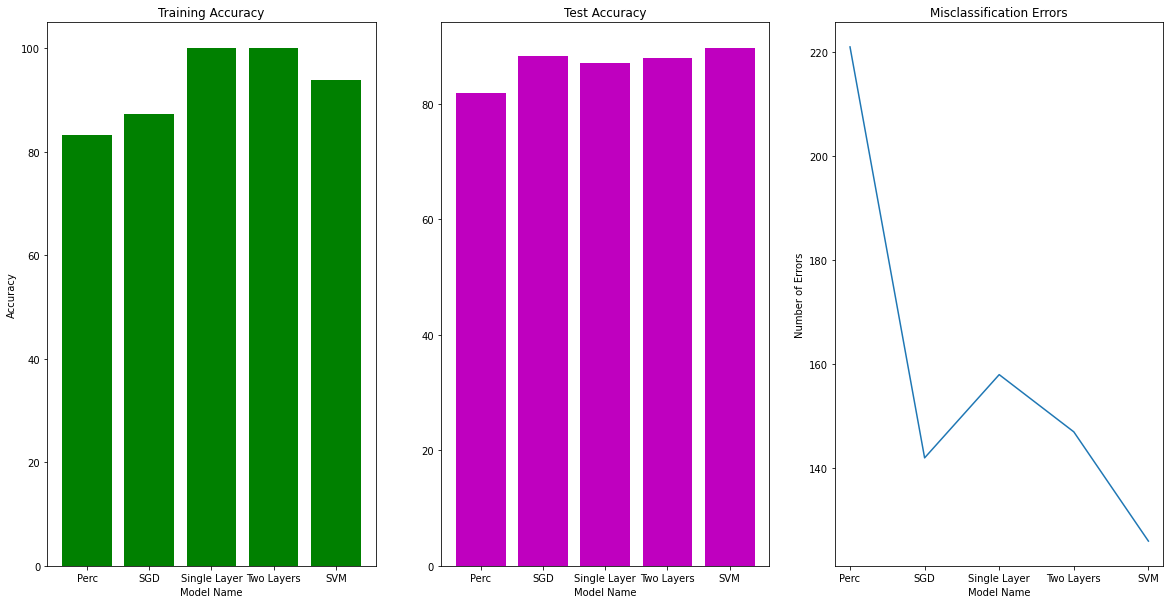

In [169]:
#Compare the training, test accuracy and misclassification errors in the models
perc = ['Perc', trgAccPerc, testAccPerc, mcPerc]
SGD = ['SGD', trgAccSGD, testAccSGD, mcSGD]
MLPSingle = ['Single Layer', trgAccMLP, testAccMLP, mcMLP]
MLPTwo = ['Two Layers', trgAccMLP2, testAccMLP2, mcMLP2]
SVM = ['SVM', trgAccSVM, testAccSVM, mcSVM]

mdl = ['Model Name','Trg Acc', 'Test Acc', 'Misclassification Errors']
           
listModels = [perc, SGD, MLPSingle, MLPTwo, SVM]

modelsDF = pd.DataFrame(listModels, columns = mdl)

modelsDF


fig, (ax1, ax2, ax3) =plt.subplots(1,3, figsize = (20,10))
ax1.bar(modelsDF['Model Name'] , modelsDF['Trg Acc'], color='g')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Model Name")
ax1.set_title("Training Accuracy")
ax2.bar(modelsDF['Model Name'] , modelsDF['Test Acc'],color='m')
ax2.set_title("Test Accuracy")
ax2.set_xlabel("Model Name")
ax3.plot(modelsDF['Model Name'], modelsDF['Misclassification Errors'])
plt.xlabel("Model Name")
plt.ylabel("Number of Errors")
plt.title("Misclassification Errors")
plt.show()

#Highest training accuracy of 100% is MLP with either one or two Layers. Each layer has 128 units. 
#However its test accuracy is lower and hence misclassification error is higher compared to SVM 
#SVM has comparable training accuracy but slightly better test accuracy and lowest misclassification error.
#Best model is SVM as it has lowest misclassification error with highest test accuracy.